In [1]:
import pandas as pd
import cv2
import requests
import tqdm 

In [2]:
import matplotlib.pyplot as plt

### Comprobación de imagen en el url

In [3]:
df = pd.read_csv('https://query.data.world/s/krujbjduhqp5cr4q6ukkc3rlf2nqjz')

In [4]:
def img_read(url):
    img_data = requests.get(image_url).content
    return img_data

```
url_check = []
for i in range(1,10):
    image_url = df['imageurl'][i]
    image_id =  df['_unit_id'][i]
    
    img_data = img_read(image_url)
        
    with open('prueba.jpg'.format(image_id), 'wb') as handler1:
        handler1.write(img_data)
        
    image = cv2.imread('prueba.jpg')
    
    if image is None:
        # print('Vacio')
        url_check.append(False)
    else:
        # print('No vacio')
        url_check.append(True)
        # with open('Image/{}.jpg'.format(image_id), 'wb') as handler:
        #     handler.write(img_data)
```



In [5]:
# url_check = []
# for i in range(1,10):
#     image_url = df['imageurl'][i]
#     image_id =  df['_unit_id'][i]
    
#     img_data = img_read(image_url)
        
#     with open('prueba.jpg'.format(image_id), 'wb') as handler1:
#         handler1.write(img_data)
        
#     image = cv2.imread('prueba.jpg')
    
#     if image is None:
#         # print('Vacio')
#         url_check.append(False)
#     else:
#         # print('No vacio')
#         url_check.append(True)
#         # with open('Image/{}.jpg'.format(image_id), 'wb') as handler:
#         #     handler.write(img_data)

### Descarga de imagenes



```
paht_images =  'drive/MyDrive/WJ/Images'
for i in tqdm.tqdm(range(len(data))):
    image_url = data['imageurl'][i]
    image_id =  data['_unit_id'][i]
    
    img_data = img_read(image_url)
    with open('{}/{}.jpg'.format(paht_images,image_id), 'wb') as handler:
      handler.write(img_data)
```



In [6]:
path_csv = 'drive/MyDrive/WJ'
data = pd.read_csv('{}/Filtrado_image-Sentiment-polarity-DFE.csv'.format(path_csv))

In [7]:
Keys = data.keys()

In [8]:
Keys

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state',
       '_trusted_judgments', '_last_judgment_at',
       'which_of_these_sentiment_scores_does_the_above_image_fit_into_best',
       'which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence',
       'imageurl',
       'which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold',
       'which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason'],
      dtype='object')

In [9]:
data[data['_golden']]

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,which_of_these_sentiment_scores_does_the_above_image_fit_into_best,which_of_these_sentiment_scores_does_the_above_image_fit_into_best:confidence,imageurl,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold,which_of_these_sentiment_scores_does_the_above_image_fit_into_best_gold_reason
0,0,694550568,True,golden,47,NaN,Positive,0.6395,http://farm1.staticflickr.com/20/71235476_3103...,Highly positive\nPositive,"He is smiling. => happy, joy"
1,1,694550569,True,golden,36,NaN,Positive,0.6458,http://farm4.staticflickr.com/3096/2584485524_...,Highly positive\nPositive,A beautiful scenery. => serenity
2,2,694550570,True,golden,35,NaN,Negative,0.8420,http://farm3.staticflickr.com/2880/11733997835...,Negative\nHighly negative,"They look serious. => sadness, fear"
3,3,694550571,True,golden,41,NaN,Positive,0.7216,http://farm4.staticflickr.com/3022/2286937150_...,Highly positive\nPositive,"A cute puppy. => happy, joy"
4,4,694550572,True,golden,46,NaN,Positive,0.8801,http://farm1.staticflickr.com/163/357381033_d0...,Highly positive\nPositive,"She looks fun. => fun, joy, happy"
...,...,...,...,...,...,...,...,...,...,...,...
544,607,694551213,True,golden,41,NaN,Highly negative,0.7216,http://farm3.staticflickr.com/2771/4375119273_...,Negative\nHighly negative,NaN
545,608,694551214,True,golden,38,NaN,Positive,0.6411,http://farm5.staticflickr.com/4016/4431934354_...,Positive\nHighly positive,NaN
546,609,694551215,True,golden,36,NaN,Positive,0.8398,http://farm5.staticflickr.com/4051/4666252122_...,Positive\nHighly positive,NaN
547,610,694551216,True,golden,44,NaN,Highly negative,0.8033,http://farm2.staticflickr.com/1271/4668910563_...,Highly negative\nNegative,NaN


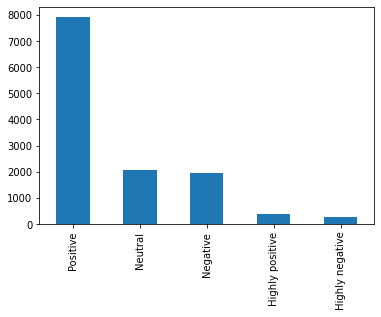

In [10]:
data['which_of_these_sentiment_scores_does_the_above_image_fit_into_best'].value_counts().plot(kind='bar')

## Modelo

In [11]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
import keras.applications
import numpy as np
from tensorflow.keras.models import load_model

In [12]:
model = ResNet50(weights='imagenet')

In [13]:
model

In [14]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [16]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

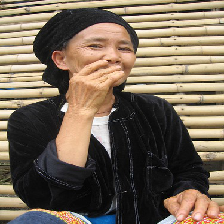

In [15]:
image.load_img('drive/MyDrive/WJ/Images/694550572.jpg',target_size=(224, 224))